$$
\large \textbf{Problema 02}
$$

Considere el entramado mostrado en la figura, con una fuerza aplicada de $20\:kN$. Calcule los desplazamientos de cada uno de los nodos y las tensiones que sufre cada elemento. Todos los elementos tienen $E=210\:GPa$ y una sección de $10\:cm^2$, excepto el elemento 3, que tiene una sección de $20\:cm^2$. Los elementos 2 y 5 tienen una longitud de $8\:m$ y el elemento 3 de $4\:m$.
<center><img src="ImgProb02.png"></center>

***

In [1]:
import mef
import numpy as np
import matplotlib.pyplot as plt   # Librería de gráficos
plt.rc('figure', figsize=(10,7))
plt.rc('font', size=14)

## Datos del problema
Grados de libertad por nodo:

In [2]:
glxn = 2

Matriz de nodos:

In [3]:
MN = np.array([[0, 0, 0],
               [8, 0, 0],
               [16, 0, 0],
               [8, 4, 0]])
Nn = MN.shape[0]

Matriz de conectividad:

In [4]:
MC = np.array([[0, 3],
               [0, 1],
               [1, 3],
               [2, 3],
               [1, 2]])
Ne, Nnxe = MC.shape

Módulo elástico y área de cada elemento:

In [5]:
E = 2.1E11*np.ones(5)
A = np.array([10, 10, 20, 10, 10])*1E-4

Condiciones de vínculo:

In [6]:
s = np.array([0, 1, 5])
Us = np.array([0, 0, 0]).reshape([-1, 1])

r = np.array([i for i in range(glxn*Nn) if i not in s])
Fr = np.array([0, -20000, 0, 0, 0]).reshape([-1, 1])

## Resolución

In [7]:
K = mef.Kglobal(MN, MC, E, A, glxn)

In [8]:
F, U = mef.solve(K, r, Fr, s, Us)

In [10]:
UD = U.reshape(Nn, glxn)
MND = MN[:, :2] + UD
sig = np.zeros([Ne, 1])
for e in range(Ne):
    Lo = np.sqrt((MN[MC[e, 1], 0]-MN[MC[e, 0], 0])**2+(MN[MC[e, 1], 1]-MN[MC[e, 0], 1])**2)
    Lf = np.sqrt((MND[MC[e, 1], 0]-MND[MC[e, 0], 0])**2+(MND[MC[e, 1], 1]-MND[MC[e, 0], 1])**2)
    dL = Lf-Lo
    sig[e] = E[e]*dL

In [21]:
print()
print('\033[1m Desplazamientos y fuerzas en cada nodo: \033[0m')
for nodo in range(Nn):
    print('\033[1m \033[33m    Nodo %s \033[0m   Ux = %2.3f mm     Uy = %6.3f mm     Fx = %3.1f kN     Fy = %5.1f kN' % (nodo+1, U[2*nodo]*1000, U[2*nodo+1]*1000, F[2*nodo]/1000, F[2*nodo+1]/1000))
print()
print('\033[1m Tensiones en cada elemento: \033[0m')
for elemento in range(Ne):
    print('\033[1m \033[33m    Elem %s \033[0m   R = %7.2f MPa' % (elemento+1, sig[elemento]*1E-6))


 Desplazamientos y fuerzas en cada nodo: 
     Nodo 1    Ux = 0.000 mm     Uy =  0.000 mm     Fx = 0.0 kN     Fy =  10.0 kN
     Nodo 2    Ux = 0.762 mm     Uy = -3.844 mm     Fx = 0.0 kN     Fy = -20.0 kN
     Nodo 3    Ux = 1.524 mm     Uy =  0.000 mm     Fx = 0.0 kN     Fy =  10.0 kN
     Nodo 4    Ux = 0.762 mm     Uy = -3.653 mm     Fx = 0.0 kN     Fy =   0.0 kN

 Tensiones en cada elemento: 
     Elem 1    R = -199.85 MPa
     Elem 2    R =  160.19 MPa
     Elem 3    R =   40.00 MPa
     Elem 4    R = -199.85 MPa
     Elem 5    R =  160.19 MPa


## Gráfico

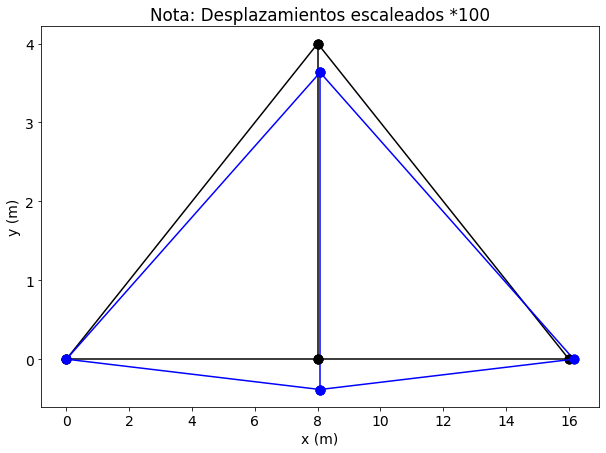

In [12]:
DXY = np.reshape(U, (len(MN), 2))
MND = MN[:, :2] + DXY*100
fig, ax = plt.subplots()
for L in MC:
    ax.plot(MN[L, 0], MN[L, 1], '-ok', ms=9)
    ax.plot(MND[L, 0], MND[L, 1], '-ob', ms=9)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Nota: Desplazamientos escaleados *100')
plt.show()